# Graphs

This notebook uses Python (especially matplotlib and NetworkX) to explore some properties of graphs. Points of 
exploration include...

* a few types of graphs that NetworkX knows how to generate
  - random geometric (n vertices, t distance threshold) = uniform distribution in 2D space, edge if $dist(u, v) < t$
* spectral analysis of a graph

In [1]:
import sys          # used to halt the program
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import random as r
from numpy import zeros
import warnings; warnings.simplefilter('ignore')

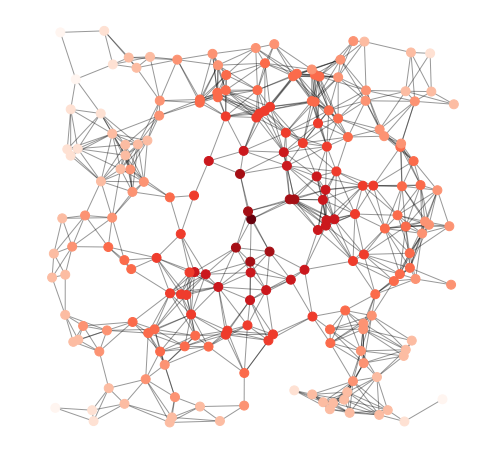

In [2]:
# A random geometric graph creates edges based on thresholded proximity

G = nx.random_geometric_graph(200, 0.125)

# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

### Spectral graph theory talk part 1

My goals are to unpack the jargon a bit and set up a little slider-based experimentation space.

- [Spielman course notes are here](http://www.cs.yale.edu/homes/spielman/561/)
- [He also provides a modest exegesis in 88 slides here](http://www.cs.yale.edu/homes/spielman/TALKS/haifa1.pdf).

- A graph can be represented as either a Laplacian or a normalized Laplacian $n\;\times\;n$ matrix
- For an un-directed graph this will be real symmetric and will have real non-negative eigenvalues
- These $n$ eigenvalues are sorted in increasing order $\{\lambda_0,\;\lambda_1,\;\lambda_2\;\dots\;\lambda_{n=1}\}$
  - Notice I use Fan Chung's subscript notation for the spectrum beginning at 0

* connect matrices to graphs
* Dan Spielman lecture notes

Define a cut as a (minimal) collection of cut edges to break the graph into disconnected sub-graphs.

Isoperimetric ratio $\theta(S)$ I refer to as IPR. 

Important in getting to Cheeger's inequality: Rayleigh quotients of eigenvalues orthogonal to the $1$ vector which has $\lambda_0=0$. The RQ is used in an upper bound on IPR. The second eigenvalue $\lambda_1$ is used in like fashion to 
give an upper bound of the IPR of G. That is we want to find vertex subsets S with low isoperimetry. 

Something like $\theta(S_t)\le \sqrt{2d\lambda_1}$.

It would be helpful to work some examples. 

Cheeger's inequality can be generalized for k-clustering. 

### Spectral graph theory talk part 2

Max flow problem: Push as much flow as possible from $s$ to $t$ without exceeding the flow capacity of the edges. 

That is: Given a directed graph with flows indicated as directions and edge capacities as positive numbers. 
There are two key vertices. Ford-Fulkerson (FF) algorithm cited. $O(mF)$ time. Blocking Flow speeds things up; to
$O(m^{3/2})$ time. A sequence of augmentations. 

Exploiting the relation between distance and cut size accelerates Blocking Flow as an algorithm in comparison 
with FF. 

#### Graph partitioning and region growing

For any value R > 0 can partition a graph into n clusters with some properties... 

M is a 'net flow' matrix. 

Use electrical flows; Laplacian linear system; fast to solve. 

Refers to $l_1, \; l_2, \; \dots \;,l_\infty$.







### Why we want to win the karate trophy


Aric Hagberg (speaker) with nods en passant to Dan Schult, Jarrod Millman


* Open data at Los Alamos National Lab? [you bet!](csr.lanl.gov/data)
  * includes ML on graphs and synthetic bad guys
  * Unified Host and Network Data Set: no doi.
  * Comprehensive Multi-Source Cyber-Security Events doi:10.17021/1179829
  * User-Computer authentication associateions in time doi:10.11578/1160076

### More talks

- Human brain longitudinal progression studies: Implies a kind of graph superposition.

- Graph clustering
- Second eigenvalue to select out
- LocalGraphClustering search on GitHub... 100e6-edge graphs on a laptop


#### Sequence Assembly Graphs and their construction

* PhD student Titus Brown lab UCD
* assembly graphs
* de Bruijn graphs have implicitly defined edges: 
  - I can find its neighbors by querying the set of vertices... etcetera
  - the sequence length parameter $k$ is the critical optimization
  - these graphs are easy to implement but tend to memory intensive

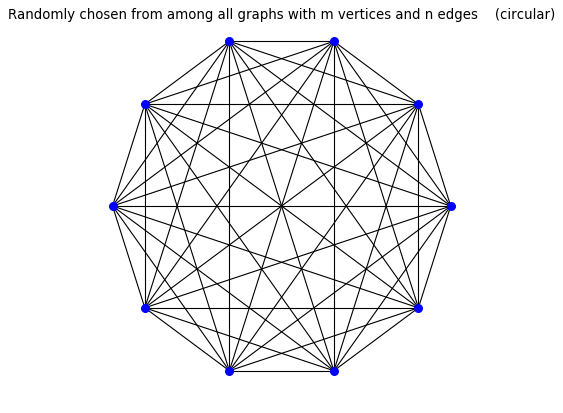

Eigenvalues:0.000, 1.111, 1.111, 1.111, 1.111, 1.111, 1.111, 1.111, 1.111, 1.111


<function __main__.DrawSomeGraph(type_choice, n, control, layout)>

In [5]:
import numpy.linalg

# These imports give us control sliders that we use for selecting depth slices from the dataset
from ipywidgets import *
from traitlets import dlink
 
e = []
v = []

# This creates a 2D color-coded view of oxygen at the surface, attaching a slider to a depth parameter
def DrawSomeGraph(type_choice, n, control, layout):
    
    global e, v
    
    plt.figure(num=None, figsize=(6,6), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    
    title_string = 'i was never given a title for this... odd'

    probability = float(control)/100.0

    if type_choice == 0: # G(n,m) chooses one possible graph with n vertices and m edges at random
        m = control # number of edges
        G = nx.gnm_random_graph(n, m)
        title_string = 'Randomly chosen from among all graphs with m vertices and n edges'
    elif type_choice == 1: 
        G = nx.random_graphs.erdos_renyi_graph(n, probability)
        title_string = 'Erdos-Renyi random graph with probability ' + str(probability)
    elif type_choice == 2:
        # Use this graph to win a trophy at an information theory conference
        G=nx.karate_club_graph()
        title_string = 'The Karate club graph; go claim your trophy!'
    elif type_choice == 3: 
        G = nx.heawood_graph()
        title_string = 'Heawood graph, a cubic graph on 14 vertices with girth 6'
    elif type_choice == 4:
        k = min(n, 5)
        G = nx.newman_watts_strogatz_graph(n, k, probability)
        title_string = 'Small world graph'
    elif type_choice == 5: 
        k = min(n, 10)
        G = nx.powerlaw_cluster_graph(n, k, probability)
        title_string = 'Power law cluster graph'
    elif type_choice == 6: 
        k = int(control * n / 100)
        if k < 1: k = 1
        G = nx.barabasi_albert_graph(n, k)
        title_string = 'Preferential attachment graph'
    elif type_choice == 7: 
        G = nx.complete_graph(n)
        title_string = 'complete graph'
    elif type_choice == 8: 
        G = nx.complete_multipartite_graph(n, control)
        title_string = 'complete bipartite n, m'
    elif type_choice == 9: 
        # since the size parameter is a dimension (exponent) we auto-curtail this
        if n > 7: n = 7
        G = nx.hypercube_graph(n)
        title_string = 'Hypercube graph where n is now the dimension'
    elif type_choice == 10: 
        G = nx.random_lobster(n, probability, probability)
        title_string = 'random lobster with both probabilities ' + str(probability)
    else:
        distance_threshold = float(control)/100.
        G = nx.random_geometric_graph(n, distance_threshold)
        title_string = 'random geometric using a threshold of ' + str(distance_threshold)

    
    # Use the layout parameter to choose an arrangement scheme
    if layout == 0:
        pos=nx.circular_layout(G)
        title_string += '    (circular)'
    elif layout == 1:
        pos=nx.random_layout(G) 
        title_string += '    (random)'
    elif layout == 2:
        if type_choice == 9:
            # Multiple shells hang on a hypercube 
            pos=nx.shell_layout(G)
        else: 
            shells = []
            nShells = 1
            if n > 5: nShells += 1
            if n > 11: nShells += 1
            if n > 36: nShells += 1
            if n > 72: nShells += 1
            deltaShell = int(n / nShells)
            # n = 43 gives nShells = 4, deltaShell = 10; 0-10, 10-20, 20-30, 30-40
            for i in range(nShells):
                shells.append(range(int(i*deltaShell), int((i+1)*deltaShell)))
            if n > nShells * deltaShell: 
                shells.append(range(int(nShells*deltaShell), n))
            pos=nx.shell_layout(G, shells) 
        title_string += '    (shell)'
    elif layout == 3:
        pos=nx.spring_layout(G) 
        title_string += '    (spring)'
    elif layout == 4:
        pos=nx.spectral_layout(G)
        title_string += '    (spectral)'
    else: # there is a 'graphviz' layout but not using this 'pos =' mechanism
        pos=nx.circular_layout(G)
        title_string += '    (circular)'
    
    # This does not work properly
    # nx.draw(G)
    cut = 1.1
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    xmin = cut * min(xx for xx, yy in pos.values())
    ymin = cut * min(yy for xx, yy in pos.values())
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title_string)

    nx.draw_networkx(G,pos,with_labels=False,node_size=50,node_color='blue')
    plt.show()
    
    # print(title_string)
    
    L = nx.normalized_laplacian_matrix(G)
    e, v = numpy.linalg.eig(L.A)
    e.sort()
    for i in range(len(e)):
        if e[i] < 1.0e-14: e[i] = 0
    eivstring = "Eigenvalues:"
    nTerms = min(n, 9)
    for i in range(nTerms):
        eivstring += '%.3f' % e[i] + ', '
    if n > 10: eivstring += ', ..., '
    eivstring += '%.3f' % e[n-1]
    print(eivstring)
    # plt.hist(e, bins=100)  # histogram with 100 bins
    # plt.xlim(0, 2)  # eigenvalues between 0 and 2 
          
# This is the interactive slider
interact(DrawSomeGraph, 
            type_choice={'Gnm random': 0, \
                         'Erdos-Renyi random': 1, \
                         'Karate Club': 2, \
                         'Heawood Graph': 3, \
                         'Small world': 4, \
                         'Power law cluster': 5, \
                         'Preferential attachment': 6, \
                         'Complete': 7, \
                         'Complete Bipartite': 8, \
                         'Hypercube': 9, \
                         'Random Lobster': 10 \
                        }, 
            # type_choice=widgets.IntSlider(min=0,max=20,step=1,value=2, continuous_update=False),
            n=widgets.IntSlider(min=2,max=100,step=1,value=10, continuous_update=False),
            control=widgets.IntSlider(min=0,max=100,step=1,value=50,continuous_update=False),
            layout = {'circular': 0, \
                      'random': 1, \
                      'shell': 2, \
                      'spring': 3, \
                      'spectral': 4
                        }
        )

In [22]:
print(e, v)

[<__main__.edge object at 0x7f6e7ac68ef0>, <__main__.edge object at 0x7f6e7ac68f60>, <__main__.edge object at 0x7f6e7ac68e10>, <__main__.edge object at 0x7f6e7ac68e48>, <__main__.edge object at 0x7f6e7ac68e80>, <__main__.edge object at 0x7f6e7ac68d68>, <__main__.edge object at 0x7f6e7ac68cf8>, <__main__.edge object at 0x7f6e7ac68d30>, <__main__.edge object at 0x7f6e7ac68b38>, <__main__.edge object at 0x7f6e7ac68b00>] [<__main__.vertex object at 0x7f6e7ac68fd0>, <__main__.vertex object at 0x7f6e7ac68f98>, <__main__.vertex object at 0x7f6e7ac68a90>, <__main__.vertex object at 0x7f6e7ac686a0>, <__main__.vertex object at 0x7f6e7ac68828>, <__main__.vertex object at 0x7f6e7ac68710>, <__main__.vertex object at 0x7f6e7ac68ac8>, <__main__.vertex object at 0x7f6e7ac68a58>, <__main__.vertex object at 0x7f6e7ac680b8>, <__main__.vertex object at 0x7f6e7ac68438>, <__main__.vertex object at 0x7f6e7ac68dd8>]


In [ ]:
import inspect
print(inspect.getdoc(numpy.linalg.eig))

In [ ]:
dir(nx)

In [ ]:
import inspect
print(inspect.getdoc(nx.random_graphs.erdos_renyi_graph))

In [ ]:
print(inspect.getdoc(nx.draw))

# Leech tree section

Much of this code is whole cloth and should be re-factored as networkx code.

In [8]:
# Define the parameters of the tree
n = 11
nc2 = n*(n-1)/2
sumLT = (nc2 + 1)*(nc2)/2

vList = range(n)
eList = range(n-1)

# v[] is a list of vertices
v = []

# e[] is a list of edges
e = []
best_e = []


# h[] is a histogram of path counts, ordinate = path sum
h = []
best_h = []

# The path p will be a list of vertex indices (integers)
# The compiled pathlist paths[] is a list of lists: each a p[] list
# pp[] tracks the path length: Exhaustion of vertices index
p = []
pp = []
paths = []

# kilroy buggy...
beenThere = []

wgt = zeros((n,n),int)

# weighted is a mask of edge indices that have had weights assigned
weightedMask = zeros(n-1, int)

# weights is a mask of possible weight values that have been assigned to edges
weightsMask = zeros(n*n, int)

# racks up goodness scores upon each gauntlet run
howgoods = []

# lr[] is how many vertices are to the left (versus right) of edge i
#   This is because all edges in the tree separate the tree into two parts
#     in only one way; this is unambiguous.
#   l_i + r_i = n where left is arbitrarily the lesser of the two
#   The lr[] list has n-1 elements, one for each edge
lr = []

In [9]:
# Ok so I wrote a little 'class' code to start getting the hang of it, a 'first draft'

# The vertex class describes a given vertex in the tree
class vertex(object):
    """a tree vertex with adjacent vertices and incident edges built in"""

    def __init__(self, index, value, vertices, edges):
        self.index = index                   # tuple (file, rank)
        self.value = value                   # a weight
        self.vertices = vertices     # connected vertices list: where a path could go from here
        self.edges = edges                   # incident edges list
 
    # The informal string definition; contrast __repl__()
    def __str__(self):
        return "index {}:\nStatus: {}, {}, {} vertices, {} edges\n".format(self.index, self.value, len(self.vertices), len(self.edges))

# The edge class describes a given edge in the tree
class edge(object):
    """a tree edge incident to two vertices"""

    def __init__(self, index, weight, v1, v2):
        self.index = index                   # tuple (file, rank)
        self.weight = weight                   # a weight
        self.v1 = v1                         # first vertex this edge is incident to
        self.v2 = v2                         # second vertex this edge is incident to
 
    # The informal string definition; contrast __repl__()
    def __str__(self):
        return "index {}:\nStatus: {}, {} v1 {} v2 {}\n".format(self.index, self.weight, self.v1, self.v2)

In [10]:
# Create a tree of n vertices and n-1 edges
def CreateTree():

## Starfish
##    v.append(vertex(0,0,[1,2,15],[0,1,2]))
##    v.append(vertex(1,0,[0],[0]))
##    v.append(vertex(2,0,[0],[1]))
##    v.append(vertex(3,0,[4,5,15],[3,4,5]))
##    v.append(vertex(4,0,[3],[3]))
##    v.append(vertex(5,0,[3],[4]))
##    v.append(vertex(6,0,[7,8,15],[6,7,8]))
##    v.append(vertex(7,0,[6],[6]))
##    v.append(vertex(8,0,[6],[7]))
##    v.append(vertex(9,0,[10,11,15],[9,10,11]))
##    v.append(vertex(10,0,[9],[9]))
##    v.append(vertex(11,0,[9],[10]))
##    v.append(vertex(12,0,[13,14,15],[12,13,14]))
##    v.append(vertex(13,0,[12],[12]))
##    v.append(vertex(14,0,[12],[13]))
##    v.append(vertex(15,0,[0,3,6,9,12],[2,5,8,11,14]))

## Horsetail 1 - 1 - 1 - 1 - 1
##           |   |   |   |   | (or Wiwaxia!? Hallucigenia?!)
##           2   2   3   2   2
##    v.append(vertex(0,0,[1,2,3],[0,1,2]))
##    v.append(vertex(1,0,[0],[0]))
##    v.append(vertex(2,0,[0],[1]))
##    v.append(vertex(3,0,[0,4,5,6],[2,3,4,5]))
##    v.append(vertex(4,0,[3],[3]))
##    v.append(vertex(5,0,[3],[4]))
##    v.append(vertex(6,0,[3,7,8,9,10],[5,6,7,8,9]))
##    v.append(vertex(7,0,[6],[6]))
##    v.append(vertex(8,0,[6],[7]))
##    v.append(vertex(9,0,[6],[8]))
##    v.append(vertex(10,0,[6,11,12,13],[9,10,11,12]))
##    v.append(vertex(11,0,[10],[10]))
##    v.append(vertex(12,0,[10],[11]))
##    v.append(vertex(13,0,[10,14,15],[12,13,14]))
##    v.append(vertex(14,0,[13],[13]))
##    v.append(vertex(15,0,[13],[14]))

    # linear / chain (works fine for even or odd n)
    # But: Please see http://people.math.sc.edu/laszlo/leech7.pdf which is Laszlo Szekely and 2 others
    #   'some negative results' papers. This shows that a chain is impossible; which is rather discouraging
    #   since chains generate the best empirical scores. The rationale is instructive: The entire chain must
    #   be the last sum and must therefore have all the integer edge weights 1, 2, 3, ..., n-1; where 1 must
    #   be at the end and must be adjacent to the (n-1) weight. 
    v.append(vertex(0,0,[1],[0]))
    for i in range(1,n-1):
        v.append(vertex(i, 0,[i-1,i+1],[i-1,i]))
    v.append(vertex(n-1,0,[n-2],[n-2]))

##    # star (works fine for even or odd n)
##    v.append(vertex(0,0,[],[]))
##    for i in range(1, n): # takes values 1, 2, ..., n-1
##        v[0].vertices.append(i) # adds the radial vertices 1, 2, ..., n-1
##        v[0].edges.append(i-1) # takes values 0, 1, ..., n-2, total of n-1
##        v.append(vertex(i,0,[0],[i-1])) # takes edge values as prev line
##
##    # generalized barbell (works fine for even or odd n)
##    # vertices 0 and 1 are the hubs of two stars
##    # (n-2)/2 vertices allocated to each hub but we can make this more general as (a) and (n-2-a)
##    a = (n-2)/2
##    b = n - (2 + a)    # this works properly for odd values of n as well
##    v.append(0, 0, [1], [0])   # the two hubs are connected via edge 0
##    v.append(1, 0, [0], [0])
##    for i in range(a):
##        v[0].vertices.append(i+2)  # first hub connects to vertex i+2
##        v[0].edges.append(i+1)     #   via edge i+1
##        v.append(i+2,0,[0],[i+1])  #   and that vertex connects back
##    for i in range(b):
##        v[1].vertices.append(i+2+a)   # so if a = 1 we begin at vertex 3
##        v[1].edges.append(i+1+a)      #   and edge 2
##        v.append(i+2+a,0,[1],[i+1+a]) #   and that vertex connects back to vertex 1 via same 
                   
    # build the edge list from the vertex list; easier to get at weights this way
    for i in eList:
        e.append(edge(i,-1,0,0))
    for i in vList:
        vv = v[i]
        ne = len(vv.vertices)
        for j in range(ne):
            ee = e[vv.edges[j]]
            if ee.weight == -1:
                ee.weight = 0
                ee.v1 = i
                ee.v2 = vv.vertices[j]

In [11]:
def Is_p_in_paths(p):
    global paths
    p_reversed = p[:]
    p_reversed.reverse()
    if p in paths or p_reversed in paths: return True
    return False

def Step(i):
    global p
    global paths
    global pp
    global ppI
    global v
    
    # push vertex i onto the path
    p.append(i)

    # a new path p adds to paths iff not there yet *and* more than one vertex in length
    if len(p) > 1 and not Is_p_in_paths(p): paths.append(p[:])
    
    # path pointer is a List index that points to the zeroth neighbor of this vertex
    pp.append(0)
    ppI = len(pp)-1
    # Now pp[ppI] is the *index* of "next vertex to consider"
    #   access this via v[i].vertices[pp[ppI]]

    while True:
        # out of 'next vertex to consider's? fall out of while
        #   graph is connected so len(v[i].vertices) is 1 or more
        if len(v[i].vertices)-1 < pp[ppI]: break

        # nvtc stands for 'next vertex to consider'
        #   we have established that it is ok to index into it
        nvtc = v[i].vertices[pp[ppI]]
        if not nvtc in p: Step(nvtc)

        # increment the path pointer 
        pp[ppI] += 1

    # fell through to here: nowhere to go
    #   unpoint to this distal vertex
    ppI -= 1
    #   pop this distal vertex off the path
    p.pop()
    #   pop this distal index off the pointer list
    pp.pop()    
    return

In [12]:
# I think we have to bookkeep two things: 'beenThere' as a countable list of
#   'do not count this one again' and the path { p[], pp[], ppI } to track where we
#   are and which avenues have been explored. 'nope' is a do not go this way vertex
#   (being the other end of the edge in question). I suspect beenThere[] is sufficient
#   so this earns a kilroy: Can beenThere do p[]'s job? 
def AccumulateVerticesInSubTree(v0, nope):
    global p
    global pp
    global ppI
    global v
    global beenThere
    if not v0 in beenThere: beenThere.append(v0)
    p.append(v0)
    pp.append(0)
    ppI = len(pp)-1
    while True:
        if len(v[v0].vertices)-1 < pp[ppI]: break
        nvtc = v[v0].vertices[pp[ppI]]
        if nvtc != nope and not nvtc in p: AccumulateVerticesInSubTree(nvtc, nope)
        pp[ppI] += 1
    ppI -= 1
    p.pop()
    pp.pop()
    return

def GeneratePaths():
    for i in vList:
        Step(i)

def GenerateLeftRight():
    global lr
    global p
    global pp
    global beenThere
    for i in eList:
        v1 = e[i].v1
        v2 = e[i].v2
        p = []         # kilroy bad practice: not passed; global
        pp = []        # kilroy ditto
        beenThere = [] # kilroy ditto
                       # kilroy this just raises the general topic of how to deal with data structures in recursive functions
        AccumulateVerticesInSubTree(v1, v2)
        left = len(beenThere)
        if (left > n/2): left = n - left
        lr.append(left)
    # print 'lr',lr
    # Calculate the sum of all paths based on the left-right calculation
    lrSum = 0
    for i in range(1,int(n/2+1)):
        thisSum = 0
        for j in eList:
            if lr[j] == i: thisSum += e[j].weight
        # i*(n-i) is how many times this edge is traversed amongst all the paths
        thisSum *= i*(n - i)
        lrSum += thisSum
    # print 'lrSum', lrSum

In [13]:
# Simple procedure for assigning random weights but the first two are 1 and 2 since they are necessary to an LT
def LoadWeights(verbose):
    unity = r.randint(0, n-2)
    e[unity].weight = 1
    weightedMask[unity] = 1
    weightsMask[1] = 1
    deuce = unity
    while deuce == unity:
        deuce = r.randint(0, n-2)
    e[deuce].weight = 2
    weightedMask[deuce] = 1
    weightsMask[2] = 1
    for i in range(2, n-1):
        while True:
            nextWeight = r.randint(3,37)
            nextEdge = r.randint(0, n-2)
            if weightsMask[nextWeight] == 0 and weightedMask[nextEdge] == 0: break
        weightsMask[nextWeight] = 1
        weightedMask[nextEdge] = 1
        e[nextEdge].weight = nextWeight
    FillWgt()
    if verbose: print (wgt)
    return

In [14]:
def HowGood(verbose):
    global h
    sum0 = 0
    sum1 = 0
    sum2 = 0
    sumX = 0
    for i in range(int(nc2)):
        if h[i] == 0: sum0 += 1
        elif h[i] == 1: sum1 += 1
        elif h[i] == 2: sum2 += 1
        else: sumX += 1
    howGood = float(sum1)/float(nc2)
    if verbose: print ('sums:', sum0, sum1, sum2, sumX, 'how good = ', howGood)
    return howGood
        

In [15]:
def FillH(verbose):
    global paths
    global h
    nPaths = len(paths)
    h = [0]*(len(paths)+1)
    grandSum = 0
    for path in paths:
        thisSum = 0
        for i in range(len(path)-1):
            thisSum += wgt[path[i]][path[i+1]]
        grandSum += thisSum
        # h[] is the histogram and it may have entries that exceed (n choose 2) so we have to clip those
        # h[0] is how many paths have weight 0 (which in a typical scheme will be Zero)
        # h[1] is how many paths have weight 1 and so on
        # h[] indexing runs all the way to nc2 inclusive, therefore:
        if thisSum > nc2: thisSum = nc2
        h[int(thisSum)] += 1
    # print 'grandSum', grandSum
    # print 'LT sum', sumLT


# Load Weights toothpaste scheme
#
# h[] is indexed by path sum, indicates how many paths have that sum, 0, 1, 2, ... nc2.
#   Higher sums are clipped > nc2 bin. h[0] is 0 unless testing with 0-weight edges.
#   Underscore n written _n means h[n] = 1. +n: h[n] > 1, -n: h[n] == 0. _1...n means
#   h[i] = 1, 'underscore run' UR. A Leech Tree LT is defined as _1...nc2. Moving h[] towards LT
#   is 'improving the underscore'. _1...a is a Low Underscore Run LUR.
#
# Kilroy Criterion (kc): Each edge divides the tree into two sub-trees with (a) and (n-a) vertices
#   so this edge will be traversed a * (n - a) times contributing that edge weight w that many times
#   to the total weight. (a) will range from 1 to floor(n/2). This summed over all edges must in an LT
#   be equal to (nc2+1) choose 2. 
#
# The toothpaste Monte Carlo scheme:
#   - Assign weights 1, 2, ..., n-1 randomly to the (n-1) edges in the tree
#   - Repeat until nothing to do:
#     - Walk up h[] looking for smallest i for which h[i] = 2.
#     - Presume there is a single edge of weight i giving a degenerate sum with some longer path
#       - Change this weight to the next largest available weight
#
# LEFT OFF HERE BECAUSE I HAD AN IDEA: MAKE SURE THE RELOCATION VERTEX HAS h[]=0
#
#
# for edge weights: Assign 1, 2, ..., n-1 randomly to begin with a 'for sure'
#   LUR up to (n - 1). The look for h[i] = 2 (counting upwards from 3) so to identify degenerate
#   edges. Assign these new weights > the largest weight so far. This preserves/extends the LUR
#   and expands the span of h[]. If h[] > 2 then this fix does not get us to h[] = 1. With 2 or more
#   degenerate multi-edge paths a reassignment scheme is not clear. Those paths are likely
#   to share edges on small trees; so 2 + n + 4 = 1 + n + 5 and changing n may remove the
#   sum from the LUR. Changing 1, 2, 4 or 5 will break some other part of the LUR. Perhaps
#   the best strategy is to just give up on this distribution. 
#
# Toothpaste actually works well in the MC sense: A handful of attempts per one million on n = 16 with
#   a fixed tree structure (central + 5 identical Y-shaped sub-trees) exceed a score of 0.60 where
#   largest found so far is 0.625, interesting as this is 10/16. Whereas typical tries produce a flat
#   LUR followed by central peaks and zeros followed by a stretch of zeros: These rare cases tend to
#   extend all the way up to nc2.
#
# One strategy is to build on the toothpaste approach by engineering how larger edge weights are
#   modified given some decent LUR. This strategy might for example include satisfying KC. 
#
# One idea that seems un-helpful is to build from LUR-supporting sub-trees. The idea would be
#   that they would add to larger weights to tile continuous segments of the LT. It also occurs
#   to me that the failure of this idea might be used to prove no larger LTs. But overall this
#   feels just meh-inconclusive at the moment.
#
# Legacy thought: Define LT6 as the 6-vertex LT with weights 1, 2, 4, 5, 8. (1 and 2 are at one side, 4 and 8
#   on the other, 5 is the bridge.) Is LT6 a good core since it gives LUR _1..15? I think it would be
#   worth proving that no such sub-tree can be part of a larger LT. First it would help to verify that 9 and 11
#   are established as impossible, hence LT16, LT18, ... are the next candidates and 120 is the least
#   distance we must go. Suppose LT6 is part of this larger LT. Then LT must attach to LT6 in one or more
#   locations with no loops. Added weights must be 16 or higher. Take s to be the least-weighted edge
#   touching LT6. If this attaches to a vertex of edge weight 1 then we get an UR s, s+1.
#   If at the 1-2 vertex: s, s+1, s+2, (not s+3) (not s+4) s+5, (not s+6), (not s+7), (not s+8),
#   s+9, (not s+10), (not s+11), (not s+12), s+13, (not s+14), (not s+15): 10 of 15 possible
#   extensions are gone. Those would necessarily be covered by other paths in an LT. What I
#   conclude is that LT6 is not a good tool for covering h[] upwards from s. 
#
# Returning to the KC extension idea to toothpaste:
#     - some of the n-1 edges are co-opted into LUR and are not available
#     - the remaining (n-1) - LUR edges must give a weighted sum (based on lr[] the left-right List)
#         equal to the sum of 1 + 2 + ... + nc2. This uses the weight left * (n - left) which is
#         largest when left is n/2. In other words: Edges that reside in the center of the tree are
#         counted the most times, leaves the least.
#     - Therefore without changing the structure of the tree the main thing boils down to a set of
#         alpha coefficients and a set of edges divided into sets with the same left-number:
#         a1 * { w_1 } + a2 * {w_2} + ... + a_(n/2) * { w_(n/2) } = Sum - sum(LUR weights) where
#         Sum = (nc2 + 1) choose 2. Each set in this expression is actually the sum of the weights
#         with that left-value: 1, 2, ..., (n/2). 
#     - This suggests that the LUR sub-tree be connected... otherwise modifying a key edge will
#         break the LUR. In turn suggests writing code to check for this feature.
#     - The above equation is one equation in (n-1) - LUR unknowns with a little bit of constraint
#         but we could imagine further guidance on how the weights are distributed. An exhaustive search
#         might even be feasible at this point: Suppose the LUR uses up 8 of 15 edges; then we have less
#         than 7! arrangements of the remaining weights but of course multiple schemes for choosing them.
#
#   Next: Laplacian formalism e.g. concerning eigenvalues of trees; and then experimentally what
#   do we see for different strategies or MC. That is, it would be trivial except that I forget what
#   the exigencies were for weighted graphs. 
#
#   Next we have not yet gotten into placing weights on vertices and collecting these over paths.
#   These in turn could leak into the edges. Vertex weights at endpoints included? 
#
#   Malleable tree structure
#
#   Distance heuristic from the knight's tour.
#
#   Taylor's even and odd; and what about K-G-style thinking? Other scoring that correlates to the
#   various h[] scores (and multiple possible forms of this).
#
#   Software: Speed and style.
#
#   Hall of fame.
#

In [16]:
def ZeroWeights():
    for i in eList:
        e[i].weight = 0
    return

def SetUnderscoreWeightsRandomly():
    ZeroWeights()
    aPick = 0
    for i in eList:
        while True:
            aPick = r.randint(0, n-2)
            if e[aPick].weight == 0:
                break
        e[aPick].weight = i + 1
    return

def SmallestWeightInHistogramMoreThanOnce():
    FillH(False) # loads h[]
    for iX in range(1, int(nc2 + 1)): # 1, 2, ..., nc2
        if h[iX] > 1: return iX
    return -1

def FirstEdgeIndexWithWeight(w):
    for i in eList:
        if e[i].weight == w: return i
    return -1

def LargestWeightAndIndex():
    wL = -1
    iL = -1
    for i in eList:
        if e[i].weight > wL:
            wL = e[i].weight
            iL = i
    return (wL, iL)

In [17]:
def Strategy():
    return (0,-1)

def FillWgt():
    for i in eList:
        wgt[e[i].v1][e[i].v2]=e[i].weight
        wgt[e[i].v2][e[i].v1]=e[i].weight
    return

def SmallestNonzeroZeroValuedIndexInHistogram():
    for i in range(1, int(nc2+1)):
        if h[i] == 0: return i
    return 0

def HistogramTwoCoincidesWithSomeWeight():
    for i in range(1,int(nc2)+1):
        if h[i] == 2:
            for j in eList:
                if e[j].weight == i: return (i, j)
    return (0, -1)

In [18]:
def LoadWeightsUnderscoreWithReassignment(verbose):
    SetUnderscoreWeightsRandomly()
    FillWgt()
    passes = 0
    while True:
        passes += 1
        iX = SmallestWeightInHistogramMoreThanOnce()
        if iX < 0:
            if verbose: print ('scram with iX', iX, 'pass', passes)
            break
        degenerateEdge = FirstEdgeIndexWithWeight(iX)
        if degenerateEdge < 0:
            if verbose: print ('exiting at degenEdge', degenerateEdge, 'at iX', iX)
            break
        (lgstW, lgstI) = LargestWeightAndIndex()
        if lgstI < 0:
            if verbose: print ('sortie with lgstI', lgstI, 'lgstW', lgstW)
            break
        e[degenerateEdge].weight = lgstW + 1
        FillWgt()
        FillH(False)
        HowGood(False)
        (coincWeight, coincIndex) = HistogramTwoCoincidesWithSomeWeight()
        if coincWeight == 0:
            if verbose: print ('bailing at weight', lgstW + 1, 'with h[:30]', h[:30])
            break
        else:
            if verbose: print ('h[w] = 2 coincidence at edge', coincIndex, 'with weight', coincWeight)
    if verbose: print (wgt)
    return

In [19]:
def PlotH():
    plt.plot(h)
    plt.show()

def PlotHowGoods():
    plt.plot(howgoods)
    plt.show()

def PlotGraph():
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in eList:
        G.add_edge(e[i].v1,e[i].v2,weight=e[i].weight)
    pos=nx.spring_layout(G)
    nx.draw(G,pos)
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    plt.show()

def PlotBestGraph():
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in eList:
        G.add_edge(best_e[i].v1,best_e[i].v2,weight=best_e[i].weight)
    pos=nx.spring_layout(G)
    nx.draw(G,pos)
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    plt.show()

def PrintSortedEdgeWeights():
    lowestValueSoFar = 0
    nPrinted = 0
    while True:
        bestValue = 1000000
        for i in eList:
            if e[i].weight > lowestValueSoFar and e[i].weight < bestValue:
                bestValue = e[i].weight
                bestIndex = i
        lowestValueSoFar = e[bestIndex].weight
        print (lowestValueSoFar,)
        nPrinted += 1
        if nPrinted == n - 1: break
    return

In [20]:
def PrintKilroyCriterion():
    print ('KC not done yet')

def LoadWeightsURPlusBackfill(verbose):
    LoadWeightsUnderscoreWithReassignment(verbose)
    while True:
        tryAgain = False
        iX = SmallestNonzeroZeroValuedIndexInHistogram()
        if iX > 0:
            (lgstW, lgstI) = LargestWeightAndIndex()
            if lgstW > iX:
                e[lgstI].weight = iX
                FillWgt()
                FillH(False)
                tryAgain = True
                print ('adjusted',lgstW,iX)
        if not tryAgain: break
    return           

In [21]:
scores = []
CreateTree()
GeneratePaths()
GenerateLeftRight()
bestScore = 0.0
sumScore = 0.0
nTrials = 160000
modCheck = 40000
for counter in range(nTrials):
    LoadWeightsUnderscoreWithReassignment(False)
    # LoadWeightsURPlusBackfill(False)
    FillH(False)
    # print wgt
    # PrintSortedEdgeWeights()
    thisScore = HowGood(False)
    sumScore += thisScore
    if thisScore > bestScore:
        bestScore = thisScore
        best_h[:] = h
        best_e[:] = e
        kcSum = 0
        kcSum1 = 0
        for i in eList:
            kcSum += lr[i]*(n - lr[i])*e[i].weight
        print (wgt)
        print ('...gives', bestScore, 'at', counter, 'kc', kcSum, '(', sumLT, '), avg', sumScore/float(counter+1))

    if counter % modCheck == 0: print ('.....progress...', counter)
    scores.append(thisScore)
    #PlotH()

[[ 0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  7  0  0  0  0  0  0  0  0]
 [ 0  7  0 10  0  0  0  0  0  0  0]
 [ 0  0 10  0  2  0  0  0  0  0  0]
 [ 0  0  0  2  0  4  0  0  0  0  0]
 [ 0  0  0  0  4  0  5  0  0  0  0]
 [ 0  0  0  0  0  5  0 14  0  0  0]
 [ 0  0  0  0  0  0 14  0 13  0  0]
 [ 0  0  0  0  0  0  0 13  0  3  0]
 [ 0  0  0  0  0  0  0  0  3  0 15]
 [ 0  0  0  0  0  0  0  0  0 15  0]]
...gives 0.6727272727272727 at 0 kc 1610 ( 1540.0 ), avg 0.6727272727272727
.....progress... 0
[[ 0  8  0  0  0  0  0  0  0  0  0]
 [ 8  0 10  0  0  0  0  0  0  0  0]
 [ 0 10  0  5  0  0  0  0  0  0  0]
 [ 0  0  5  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  3  0  0  0  0  0]
 [ 0  0  0  0  3  0 12  0  0  0  0]
 [ 0  0  0  0  0 12  0 14  0  0  0]
 [ 0  0  0  0  0  0 14  0  7  0  0]
 [ 0  0  0  0  0  0  0  7  0 11  0]
 [ 0  0  0  0  0  0  0  0 11  0  2]
 [ 0  0  0  0  0  0  0  0  0  2  0]]
...gives 0.7090909090909091 at 12 kc 1636 ( 1540.0 ), avg 0.5846153846153846
[[ 0  5  0  0  0  0  0  0  0  0  0

In [ ]:
# print scores
print('best score = ', bestScore, 'average = ', sumScore / float(nTrials)) 
plt.plot(best_h)
plt.show()
plt.plot(scores)
plt.show()
PlotBestGraph()

#
# kc for toothpaste tends low, like 6700 < 7260
# toothpaste on starfish n=16: average 0.197
#   Y-appendage weight pairs + 5 radial spokes in same order:
#   .625: 4,8 29,32 10,25 11,39 1,2 9,33,21,40,5
#   .625: 29,30 1,5 17,34 7,26 2,9 33,3,21,32,10
#   .633: 8,30 20,40 25,39 5,10 1,34 37,24,4,9,2
#   .633: 2,5 4,8 29,30 9,26 27,32 1,10,31,33,22
#   .64166: 5,29 2,1 30,40, 32,24, 36,39 9,6,19,31,4 
#   .65833: 39,45 26,44 2,30 7,21 19,29 15,9,3,1,46
# toothpaste on horsetail (5 nodes + 2,2,3,2,2) n = 16: average 0.230
#   Working nodes across: spike, spike + lateral
#   .64166: 3,37+10 5,26+7 2,4,23+36 1,28+34 8,32 (no remaining lateral of course)
#   .65833: 20,29+28 18,16+34 26,30,19+8 17,4+5 2,1; kc 6537;
# star gives 0.1...
# linear avg .468 to .470
#   0.7 kc 8579: 13 27 26 30 3 15 2 4 1 9 28 8 11 12 29
#   0.71666 kc 9253: 2 8 23 30 22 14 1 4 7 6 3 25 24 27 29
#  2 * 1 * 15 + 8 * 2 * 14+ 23 * 3 * 13+ 30 * 4 * 12+ 22 * 5 * 11+ 14 * 6 * 10+  1 * 7 * 9+  4 * 8 * 8+  7 * 7 * 9+  6 * 6 * 10+  3 * 5 * 11+ 25 * 4 * 12+ 24 * 3 * 13+ 27 * 2 * 14+29 * 1 * 15+
# The averages for 18, 25, 27 etcetera continue to drop
#